# Starting steps
This problem is a binary classification problem.
We will be using *F1-Score* as main metric.

Starting steps:
1. Analyze the dataset: features types, uninformative features, missing values, outliers
2. Based on step 1 choose the models and its learning algorithms

In [440]:
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm

In [368]:
dataset = pd.read_csv('data/train.csv', index_col='PassengerId')
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [369]:
features = dataset.loc[:, dataset.columns.drop('Survived')]
target = dataset.loc[:, 'Survived']
features.shape, target.shape

((891, 10), (891,))

In [370]:
print(f'Survived: {len(target[target == 0])}, dead: {len(target[target == 1])}')

Survived: 549, dead: 342


## Feature types

In [371]:
features.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [372]:
cont_features = ['Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Pclass', 'Sex', 'Cabin', 'Embarked']

In [373]:
for i in cat_features:
    print(f'# of categories in "{i}": {len(np.unique(features.loc[:, i].apply(str)))}')

# of categories in "Pclass": 3
# of categories in "Sex": 2
# of categories in "Cabin": 148
# of categories in "Embarked": 4


In [374]:
for i in cat_features:
    print(f'unique categories in "{i}": {np.unique(features.loc[:, i].apply(str))}')

unique categories in "Pclass": ['1' '2' '3']
unique categories in "Sex": ['female' 'male']
unique categories in "Cabin": ['A10' 'A14' 'A16' 'A19' 'A20' 'A23' 'A24' 'A26' 'A31' 'A32' 'A34' 'A36'
 'A5' 'A6' 'A7' 'B101' 'B102' 'B18' 'B19' 'B20' 'B22' 'B28' 'B3' 'B30'
 'B35' 'B37' 'B38' 'B39' 'B4' 'B41' 'B42' 'B49' 'B5' 'B50' 'B51 B53 B55'
 'B57 B59 B63 B66' 'B58 B60' 'B69' 'B71' 'B73' 'B77' 'B78' 'B79' 'B80'
 'B82 B84' 'B86' 'B94' 'B96 B98' 'C101' 'C103' 'C104' 'C106' 'C110' 'C111'
 'C118' 'C123' 'C124' 'C125' 'C126' 'C128' 'C148' 'C2' 'C22 C26'
 'C23 C25 C27' 'C30' 'C32' 'C45' 'C46' 'C47' 'C49' 'C50' 'C52' 'C54'
 'C62 C64' 'C65' 'C68' 'C7' 'C70' 'C78' 'C82' 'C83' 'C85' 'C86' 'C87'
 'C90' 'C91' 'C92' 'C93' 'C95' 'C99' 'D' 'D10 D12' 'D11' 'D15' 'D17' 'D19'
 'D20' 'D21' 'D26' 'D28' 'D30' 'D33' 'D35' 'D36' 'D37' 'D45' 'D46' 'D47'
 'D48' 'D49' 'D50' 'D56' 'D6' 'D7' 'D9' 'E10' 'E101' 'E12' 'E121' 'E17'
 'E24' 'E25' 'E31' 'E33' 'E34' 'E36' 'E38' 'E40' 'E44' 'E46' 'E49' 'E50'
 'E58' 'E63' 'E67' 

## Uninformative features

In [375]:
uninformative_features = ['Name', 'Ticket']

## Missing values

In [376]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


In [377]:
for i in features.columns:
    print(f'# if NaN in "{i}": {np.sum(pd.isna(features.loc[:, i]))}')

# if NaN in "Pclass": 0
# if NaN in "Name": 0
# if NaN in "Sex": 0
# if NaN in "Age": 177
# if NaN in "SibSp": 0
# if NaN in "Parch": 0
# if NaN in "Ticket": 0
# if NaN in "Fare": 0
# if NaN in "Cabin": 687
# if NaN in "Embarked": 2


## Outliers

In [378]:
import matplotlib.pyplot as plt
import seaborn as sns

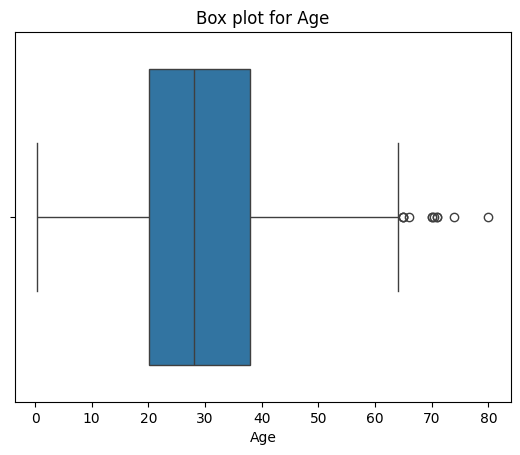

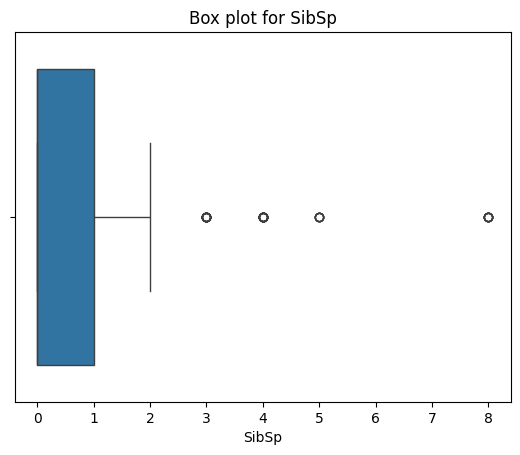

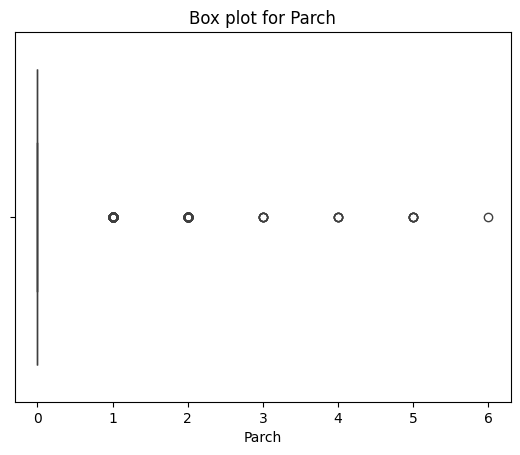

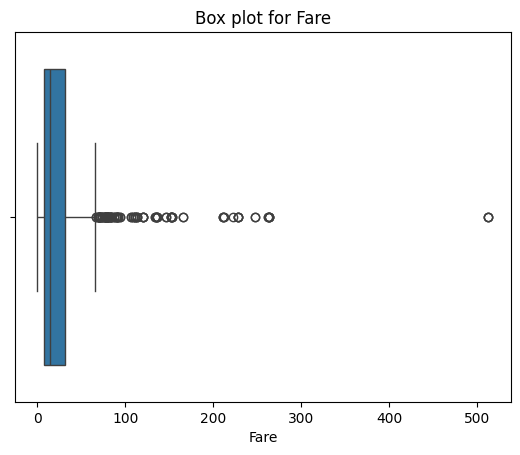

In [379]:
# Boxplots
for feature in cont_features:
    sns.boxplot(x=features[feature])
    plt.title(f'Box plot for {feature}')
    plt.show()

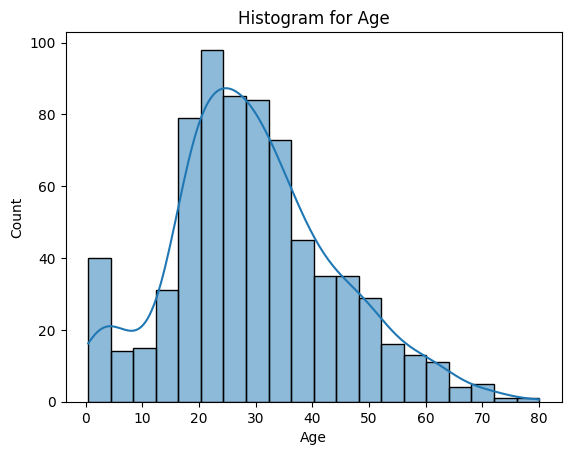

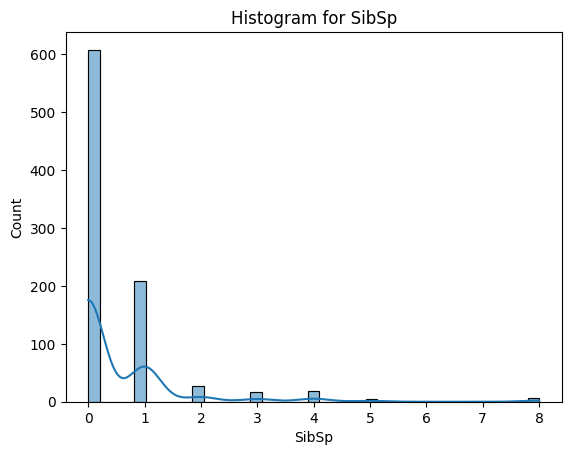

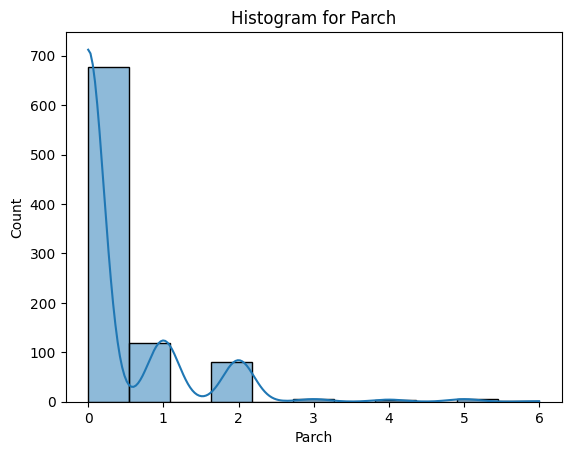

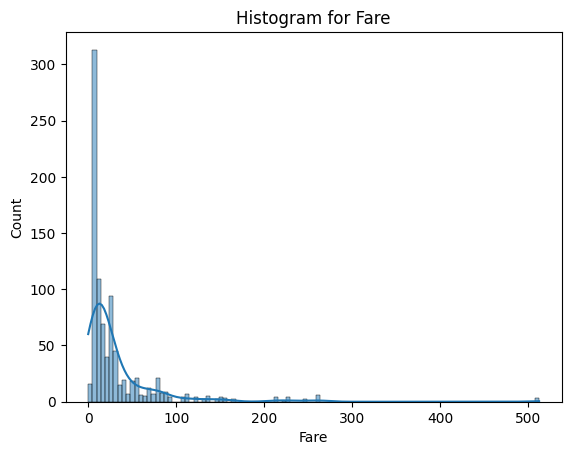

In [380]:
# Histograms
for feature in cont_features:
    sns.histplot(features[feature], kde=True)
    plt.title(f'Histogram for {feature}')
    plt.show()

So, we have no outliers in continuous features data.

Check the categorical features

In [381]:
# Frequency Analysis
for feature in cat_features:
    print(features[feature].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


# Preprocessing the data

After the analysis of the dataset we have found:
1. The numbers of survived and dead people are almost equal, so we have almost balanced dataset
2. We found 2 uninformative features
3. We have 4 categorical and 4 continuous features
4. In 'Age' continouos feature we have lost of NaN (~200 objects)
5. In 'Embarked' we have only 2 None values
6. In 'Cabin' we have ~700 None values
7. We have no outliers in dataset

We will do this steps:
1. Drop uninformative features
2. Add new category 'Missing' for 'Cabin' and 'Embarked'
3. Use imputer for missing values in 'Age'

As baseline models we will use:
1. kNN
2. Naive Bayes
3. Logistic Regression
4. Random Forest

As final models we will use:
1. Gradient Boosting (from catboost - because we have 50% of categorical features)

We also need to find best of this types of preprocessing the 'Cabin' feature:
1. Extract the letter from str value
2. OneHot the cabins
3. Drop this feature

And for the 'Age' feature:
1. Imputing with kNN
2. Imputing with MICE (IterativeImputer)
3. Imputing with mean, median, mode

In [382]:
# remove uninformative features
features = features.loc[:, features.columns.drop(uninformative_features)]
features.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [383]:
from sklearn.impute import SimpleImputer

# create 'Missing' category
features.loc[:, ['Cabin', 'Embarked']] = SimpleImputer(missing_values=pd.NA, strategy='constant', fill_value='Missing').fit_transform(features.loc[:, ['Cabin', 'Embarked']])

for i in ['Cabin', 'Embarked']:
    print(np.unique(features.loc[:, i]))

['A10' 'A14' 'A16' 'A19' 'A20' 'A23' 'A24' 'A26' 'A31' 'A32' 'A34' 'A36'
 'A5' 'A6' 'A7' 'B101' 'B102' 'B18' 'B19' 'B20' 'B22' 'B28' 'B3' 'B30'
 'B35' 'B37' 'B38' 'B39' 'B4' 'B41' 'B42' 'B49' 'B5' 'B50' 'B51 B53 B55'
 'B57 B59 B63 B66' 'B58 B60' 'B69' 'B71' 'B73' 'B77' 'B78' 'B79' 'B80'
 'B82 B84' 'B86' 'B94' 'B96 B98' 'C101' 'C103' 'C104' 'C106' 'C110' 'C111'
 'C118' 'C123' 'C124' 'C125' 'C126' 'C128' 'C148' 'C2' 'C22 C26'
 'C23 C25 C27' 'C30' 'C32' 'C45' 'C46' 'C47' 'C49' 'C50' 'C52' 'C54'
 'C62 C64' 'C65' 'C68' 'C7' 'C70' 'C78' 'C82' 'C83' 'C85' 'C86' 'C87'
 'C90' 'C91' 'C92' 'C93' 'C95' 'C99' 'D' 'D10 D12' 'D11' 'D15' 'D17' 'D19'
 'D20' 'D21' 'D26' 'D28' 'D30' 'D33' 'D35' 'D36' 'D37' 'D45' 'D46' 'D47'
 'D48' 'D49' 'D50' 'D56' 'D6' 'D7' 'D9' 'E10' 'E101' 'E12' 'E121' 'E17'
 'E24' 'E25' 'E31' 'E33' 'E34' 'E36' 'E38' 'E40' 'E44' 'E46' 'E49' 'E50'
 'E58' 'E63' 'E67' 'E68' 'E77' 'E8' 'F E69' 'F G63' 'F G73' 'F2' 'F33'
 'F38' 'F4' 'G6' 'Missing' 'T']
['C' 'Missing' 'Q' 'S']


In [384]:
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Imputers for 'Age' feature
age_imputers = {
    'mean': SimpleImputer(strategy='mean'),
    'median': SimpleImputer(strategy='median'),
    'mode': SimpleImputer(strategy='most_frequent'),
    'kNN': KNNImputer(n_neighbors=5), # only if continuous features in dataset
    'MICE': IterativeImputer() # only if continuous features in dataset
}

In [385]:
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator


# make class for transforming Cabin feature
# input: pd.Series of 'Cabin' feature
# return: transformed pd.Series of 'Cabin' feature
class CabinPreprocessing(BaseEstimator, TransformerMixin):
    def __init__(self, type):
        self.type = type
    
    def fit(self, data, *args):
        match self.type:
            case 'letter':
                self.unique_letters = np.unique(data.loc[:, 'Cabin'].apply(lambda x: str(x)[0]))
                
        return self
    
    def transform(self, data):
        match self.type:   
            case 'letter':
                data['Cabin'] = data.loc[:, 'Cabin'].apply(lambda x: str(x)[0] if str(x)[0] in self.unique_letters else 'M')
                return data

# kNN

In [231]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# for kNN we need to do the normalization and then encode categoriacal features as continuous

## Case 1. Age: mean impute, Cabin: drop

In [416]:
features_edit = features
target_edit = target

In [417]:
features_edit.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [418]:
features_edit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    object 
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [419]:
features_edit = features_edit.loc[:, features_edit.columns.drop('Cabin')]

In [422]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# cross-validate
n_folds = 10
test_factor = 0.20
f1_scores = dict()
cv_params = {'n_neighbors': [5, 10, 15, 20, 25, 30, 50, 60, 75, 100]}

for j in tqdm(cv_params['n_neighbors']):
    
    knn_preprocessor = ColumnTransformer(transformers=[
        ('continous', StandardScaler(), cont_features),
        ('categorical', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Pclass', 'Sex', 'Embarked'])
    ])

    clf = Pipeline(steps=[
        ('preprocessor', knn_preprocessor),
        ('classifier', KNeighborsClassifier(n_neighbors=j, weights='distance'))
    ])
    
    for i in range(n_folds):
        X_train, X_test, y_train, y_test = train_test_split(features_edit, target_edit, test_size=test_factor)
                
        X_train.loc[:, 'Age'] = age_imputers['mean'].fit_transform(X_train.loc[:, 'Age'].to_numpy().reshape(-1, 1))
        X_test.loc[:, 'Age'] = age_imputers['mean'].transform(X_test.loc[:, 'Age'].to_numpy().reshape(-1, 1))

        clf.fit(X_train, y_train)
        f1_scores[j] = f1_scores.get(j, 0) + f1_score(y_test, clf.predict(X_test))
    f1_scores[j] /= n_folds

  0%|          | 0/10 [00:00<?, ?it/s]

c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


max f1-score: 0.7323479509727586 found at n_neighboars: 25


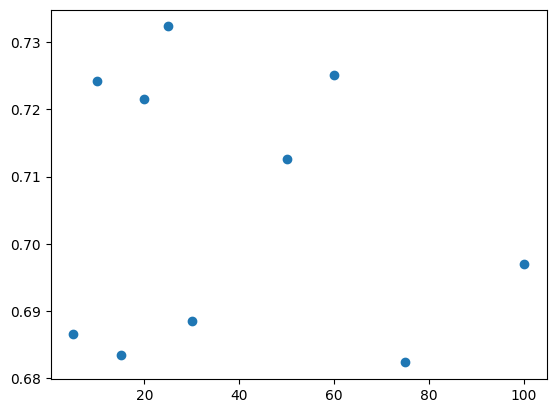

In [423]:
import matplotlib.pyplot as plt

print(f'max f1-score: {max(f1_scores.values())} found at n_neighboars: {max(f1_scores, key=f1_scores.get)}')
plt.scatter(f1_scores.keys(), f1_scores.values())

## Case 2. Age median, Cabin drop

In [424]:
features_edit = features
target_edit = target

features_edit = features_edit.loc[:, features_edit.columns.drop('Cabin')]

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# cross-validate
n_folds = 10
test_factor = 0.20
f1_scores = dict()
cv_params = {'n_neighbors': [5, 10, 15, 20, 25, 30, 50, 75, 100]}

for j in tqdm(cv_params['n_neighbors']):
    
    knn_preprocessor = ColumnTransformer(transformers=[
        ('continous', StandardScaler(), cont_features),
        ('categorical', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Pclass', 'Sex', 'Embarked'])
    ])

    clf = Pipeline(steps=[
        ('preprocessor', knn_preprocessor),
        ('classifier', KNeighborsClassifier(n_neighbors=j, weights='distance'))
    ])
    
    for i in range(n_folds):
        X_train, X_test, y_train, y_test = train_test_split(features_edit, target_edit, test_size=test_factor)
                
        X_train.loc[:, 'Age'] = age_imputers['median'].fit_transform(X_train.loc[:, 'Age'].to_numpy().reshape(-1, 1))
        X_test.loc[:, 'Age'] = age_imputers['median'].transform(X_test.loc[:, 'Age'].to_numpy().reshape(-1, 1))

        clf.fit(X_train, y_train)
        f1_scores[j] = f1_scores.get(j, 0) + f1_score(y_test, clf.predict(X_test))
    f1_scores[j] /= n_folds

 11%|█         | 1/9 [00:00<00:03,  2.46it/s]c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
 22%|██▏       | 2/9 [00:01<00:04,  1.58it/s]c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
 33%|███▎      | 3/9 [00:01<00:03,  1.75it/s]c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories wil

max f1-score: 0.7279722462454992 found at n_neighboars: 30


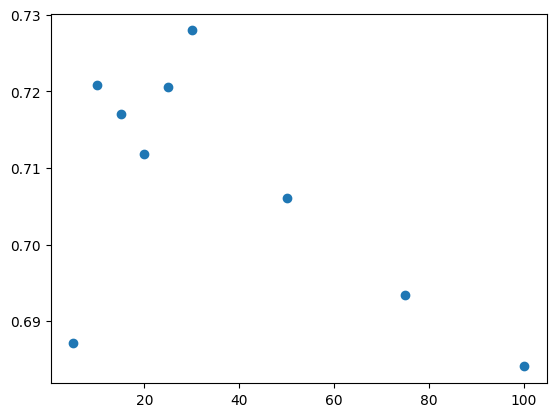

In [425]:
import matplotlib.pyplot as plt

print(f'max f1-score: {max(f1_scores.values())} found at n_neighboars: {max(f1_scores, key=f1_scores.get)}')
plt.scatter(f1_scores.keys(), f1_scores.values())

## Case 3. Age mode, Cabin drop

In [426]:
features_edit = features
target_edit = target

features_edit = features_edit.loc[:, features_edit.columns.drop('Cabin')]

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# cross-validate
n_folds = 10
test_factor = 0.20
f1_scores = dict()
cv_params = {'n_neighbors': [5, 10, 15, 20, 25, 30, 50, 75, 100]}

for j in tqdm(cv_params['n_neighbors']):
    
    knn_preprocessor = ColumnTransformer(transformers=[
        ('continous', StandardScaler(), cont_features),
        ('categorical', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Pclass', 'Sex', 'Embarked'])
    ])

    clf = Pipeline(steps=[
        ('preprocessor', knn_preprocessor),
        ('classifier', KNeighborsClassifier(n_neighbors=j, weights='distance'))
    ])
    
    for i in range(n_folds):
        X_train, X_test, y_train, y_test = train_test_split(features_edit, target_edit, test_size=test_factor)
                
        X_train.loc[:, 'Age'] = age_imputers['mode'].fit_transform(X_train.loc[:, 'Age'].to_numpy().reshape(-1, 1))
        X_test.loc[:, 'Age'] = age_imputers['mode'].transform(X_test.loc[:, 'Age'].to_numpy().reshape(-1, 1))

        clf.fit(X_train, y_train)
        f1_scores[j] = f1_scores.get(j, 0) + f1_score(y_test, clf.predict(X_test))
    f1_scores[j] /= n_folds

 22%|██▏       | 2/9 [00:01<00:03,  1.83it/s]c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
 67%|██████▋   | 6/9 [00:02<00:01,  2.30it/s]c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
100%|██████████| 9/9 [00:04<00:00,  2.13it/s]


max f1-score: 0.7352278092783034 found at n_neighboars: 30


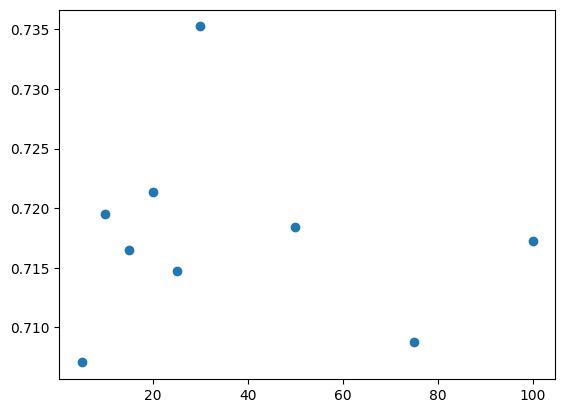

In [427]:
import matplotlib.pyplot as plt

print(f'max f1-score: {max(f1_scores.values())} found at n_neighboars: {max(f1_scores, key=f1_scores.get)}')
plt.scatter(f1_scores.keys(), f1_scores.values())

## Case 4. Age: KNN, Cabin: drop

In [428]:
# Age feature transform we need to do after onehotencoder

features_edit = features
target_edit = target

features_edit = features_edit.loc[:, features_edit.columns.drop('Cabin')]

# cross-validate
n_folds = 10
test_factor = 0.20
f1_scores = dict()
cv_params = {'n_neighbors': [5, 10, 15, 20, 25, 30, 50, 75, 100]}

for j in tqdm(cv_params['n_neighbors']):    
    for i in range(n_folds):
        X_train, X_test, y_train, y_test = train_test_split(features_edit, target_edit, test_size=test_factor)

        ohe = ColumnTransformer(transformers=[
            ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), ['Pclass',
                                                                                                'Sex',
                                                                                                'Embarked']),
            ('pass', 'passthrough', ['Age', 'SibSp', 'Parch', 'Fare'])
        ], verbose_feature_names_out=False)
        X_train = pd.DataFrame(ohe.fit_transform(X_train), columns=ohe.get_feature_names_out())
        X_test = pd.DataFrame(ohe.transform(X_test), columns=ohe.get_feature_names_out())        

        knn_imputer = KNNImputer(n_neighbors=15)
        X_train = knn_imputer.fit_transform(X_train)
        X_test = knn_imputer.transform(X_test)
        X_train = pd.DataFrame(X_train, columns=knn_imputer.get_feature_names_out())
        X_test = pd.DataFrame(X_test, columns=knn_imputer.get_feature_names_out())
        
        scaler = ColumnTransformer(
            transformers=[('scaler', StandardScaler(), cont_features)],
            remainder='passthrough'
            )
        pipe = Pipeline(steps=[
            ('scaler_cont_features', scaler),
            ('knn', KNeighborsClassifier(n_neighbors=j, weights='distance'))
        ])
        
        pipe.fit(X_train, y_train)
        f1_scores[j] = f1_scores.get(j, 0) + f1_score(y_test, pipe.predict(X_test))
        
    f1_scores[j] /= n_folds

 11%|█         | 1/9 [00:00<00:07,  1.03it/s]c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
 22%|██▏       | 2/9 [00:01<00:06,  1.04it/s]c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
 56%|█████▌    | 5/9 [00:03<00:02,  1.58it/s]c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
 67%|██████▋   | 6/9 [00:04<00:01,  1.60it/s]c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] d

max f1-score: 0.7280376434851875 found at n_neighboars: 50


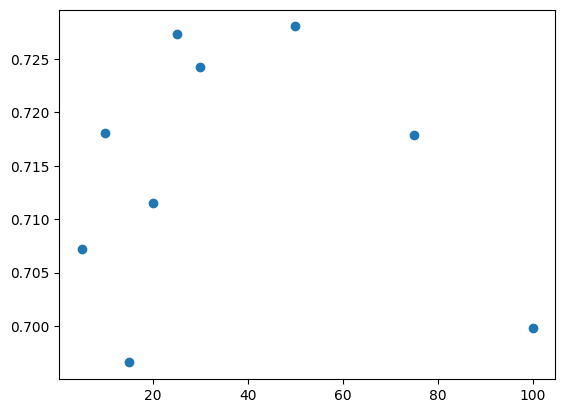

In [429]:
print(f'max f1-score: {max(f1_scores.values())} found at n_neighboars: {max(f1_scores, key=f1_scores.get)}')
plt.scatter(f1_scores.keys(), f1_scores.values())

## Case 5. Age: MICE, Cabin: drop

In [430]:
# Age feature transform we need to do after onehotencoder

features_edit = features
target_edit = target

features_edit = features_edit.loc[:, features_edit.columns.drop('Cabin')]

# cross-validate
n_folds = 10
test_factor = 0.20
f1_scores = dict()
cv_params = {'n_neighbors': [5, 10, 15, 20, 25, 30, 50, 75, 100]}

for j in tqdm(cv_params['n_neighbors']):    
    for i in range(n_folds):
        X_train, X_test, y_train, y_test = train_test_split(features_edit, target_edit, test_size=test_factor)

        ohe = ColumnTransformer(transformers=[
            ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), ['Pclass',
                                                                                                'Sex',
                                                                                                'Embarked']),
            ('pass', 'passthrough', ['Age', 'SibSp', 'Parch', 'Fare'])
        ], verbose_feature_names_out=False)
        X_train = pd.DataFrame(ohe.fit_transform(X_train), columns=ohe.get_feature_names_out())
        X_test = pd.DataFrame(ohe.transform(X_test), columns=ohe.get_feature_names_out())        
        
        mice_imputer = IterativeImputer()
        X_train = mice_imputer.fit_transform(X_train)
        X_test = mice_imputer.transform(X_test)
        X_train = pd.DataFrame(X_train, columns=mice_imputer.get_feature_names_out())
        X_test = pd.DataFrame(X_test, columns=mice_imputer.get_feature_names_out())
        
        scaler = ColumnTransformer(
            transformers=[('scaler', StandardScaler(), cont_features)],
            remainder='passthrough'
            )
        pipe = Pipeline(steps=[
            ('scaler_cont_features', scaler),
            ('knn', KNeighborsClassifier(n_neighbors=j, weights='distance'))
        ])
        
        pipe.fit(X_train, y_train)
        f1_scores[j] = f1_scores.get(j, 0) + f1_score(y_test, pipe.predict(X_test))
        
    f1_scores[j] /= n_folds

  0%|          | 0/9 [00:00<?, ?it/s]

c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
 11%|█         | 1/9 [00:01<00:12,  1.58s/it]c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
100%|██████████| 9/9 [00:09<00:00,  1.01s/it]


max f1-score: 0.7360851436633248 found at n_neighboars: 20


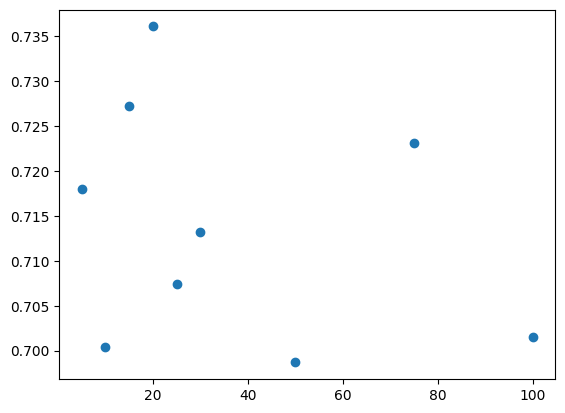

In [432]:
print(f'max f1-score: {max(f1_scores.values())} found at n_neighboars: {max(f1_scores, key=f1_scores.get)}')
plt.scatter(f1_scores.keys(), f1_scores.values())

## Case 6 Age: MICE, Cabin: first letter

In [433]:
features_edit = features
target_edit = target

n_folds = 10
test_factor = 0.20
f1_scores = dict()
cv_params = {'n_neighbors': [5, 10, 15, 20, 25, 30, 50, 75, 100]}

for j in tqdm(cv_params['n_neighbors']):    
    for i in range(n_folds):
        X_train, X_test, y_train, y_test = train_test_split(features_edit, target_edit, test_size=test_factor)
        
        cabin_transform = CabinPreprocessing(type='letter')
        X_train = cabin_transform.fit_transform(X_train)
        X_test = cabin_transform.transform(X_test)

        ohe = ColumnTransformer(transformers=[
            ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), ['Pclass',
                                                                                                'Sex',
                                                                                                'Embarked',
                                                                                                'Cabin']),
            ('pass', 'passthrough', ['Age', 'SibSp', 'Parch', 'Fare'])
        ], verbose_feature_names_out=False)
        X_train = pd.DataFrame(ohe.fit_transform(X_train), columns=ohe.get_feature_names_out())
        X_test = pd.DataFrame(ohe.transform(X_test), columns=ohe.get_feature_names_out())        
        
        mice_imputer = IterativeImputer()
        X_train = mice_imputer.fit_transform(X_train)
        X_test = mice_imputer.transform(X_test)
        X_train = pd.DataFrame(X_train, columns=mice_imputer.get_feature_names_out())
        X_test = pd.DataFrame(X_test, columns=mice_imputer.get_feature_names_out())
        
        scaler = ColumnTransformer(
            transformers=[('scaler', StandardScaler(), cont_features)],
            remainder='passthrough'
            )
        pipe = Pipeline(steps=[
            ('scaler_cont_features', scaler),
            ('knn', KNeighborsClassifier(n_neighbors=j, weights='distance'))
        ])
        
        pipe.fit(X_train, y_train)
        f1_scores[j] = f1_scores.get(j, 0) + f1_score(y_test, pipe.predict(X_test))
        
    f1_scores[j] /= n_folds

 11%|█         | 1/9 [00:03<00:25,  3.25s/it]c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
 22%|██▏       | 2/9 [00:06<00:21,  3.10s/it]c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
 33%|███▎      | 3/9 [00:09<00:18,  3.05s/it]c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
 56%|█████▌    | 5/9 [00:15<00:12,  3.08s/it]c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] d

max f1-score: 0.7305439580518245 found at n_neighboars: 25


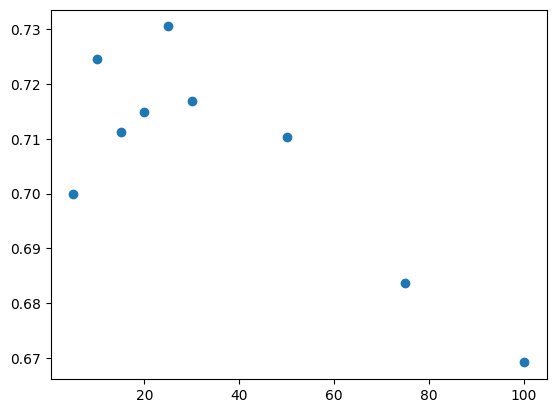

In [434]:
print(f'max f1-score: {max(f1_scores.values())} found at n_neighboars: {max(f1_scores, key=f1_scores.get)}')
plt.scatter(f1_scores.keys(), f1_scores.values())

## Results
During using KNN model the f1-score was around 0.73 level all the time. 
And what interesting that all of possible transforms with 'Age' and 'Cabin' columns didn't give an improvement of the metric.

# Naive Bayes

Fist of all, lets see at distibutions of our continuous features relative to the target

In [248]:
features.columns, np.unique(target)

(Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object'),
 array([0, 1], dtype=int64))

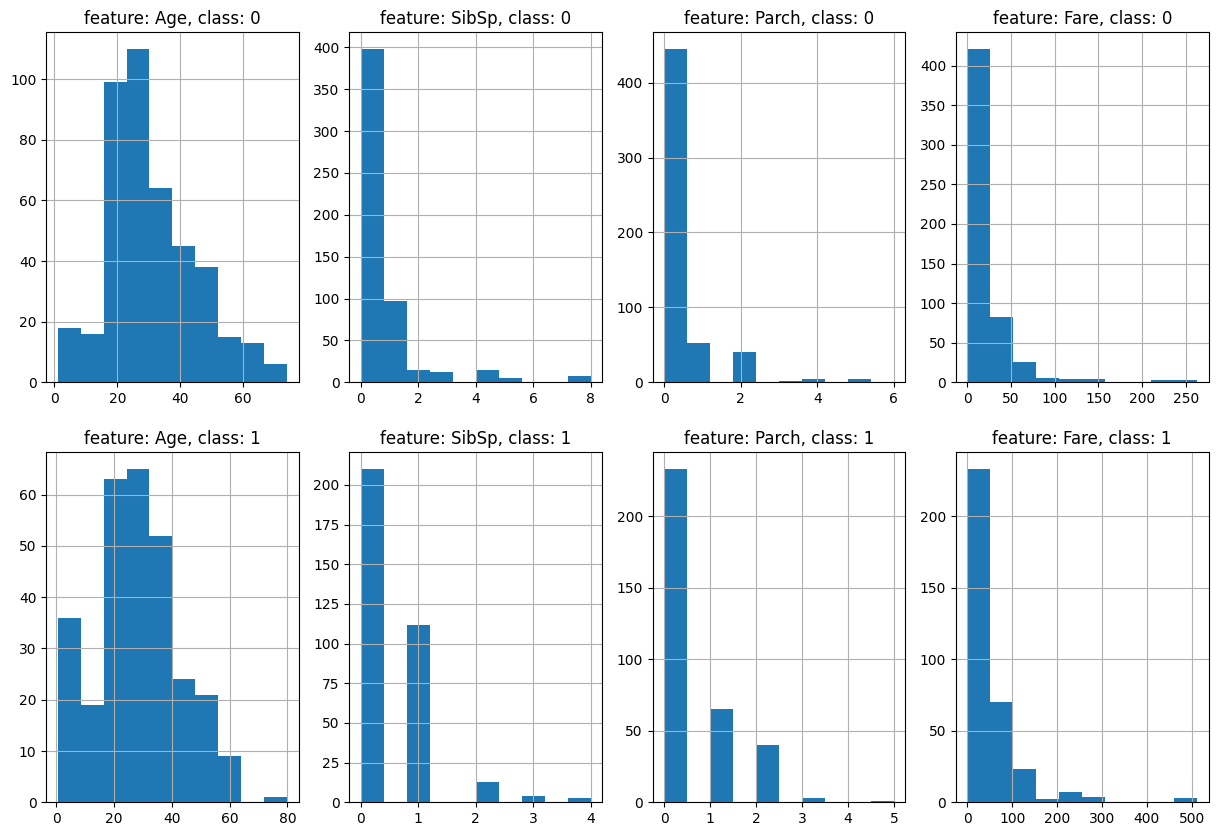

In [249]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

for feature_idx, feature_name in enumerate(cont_features):
    for label_idx, label_name in enumerate(np.unique(target)):
        ax = axes[label_idx, feature_idx]
        feature_col = features.loc[target==label_name, feature_name]
        ax.hist(feature_col, bins=10)
        ax.grid()
        ax.set_title(f'feature: {feature_name}, class: {label_name}')

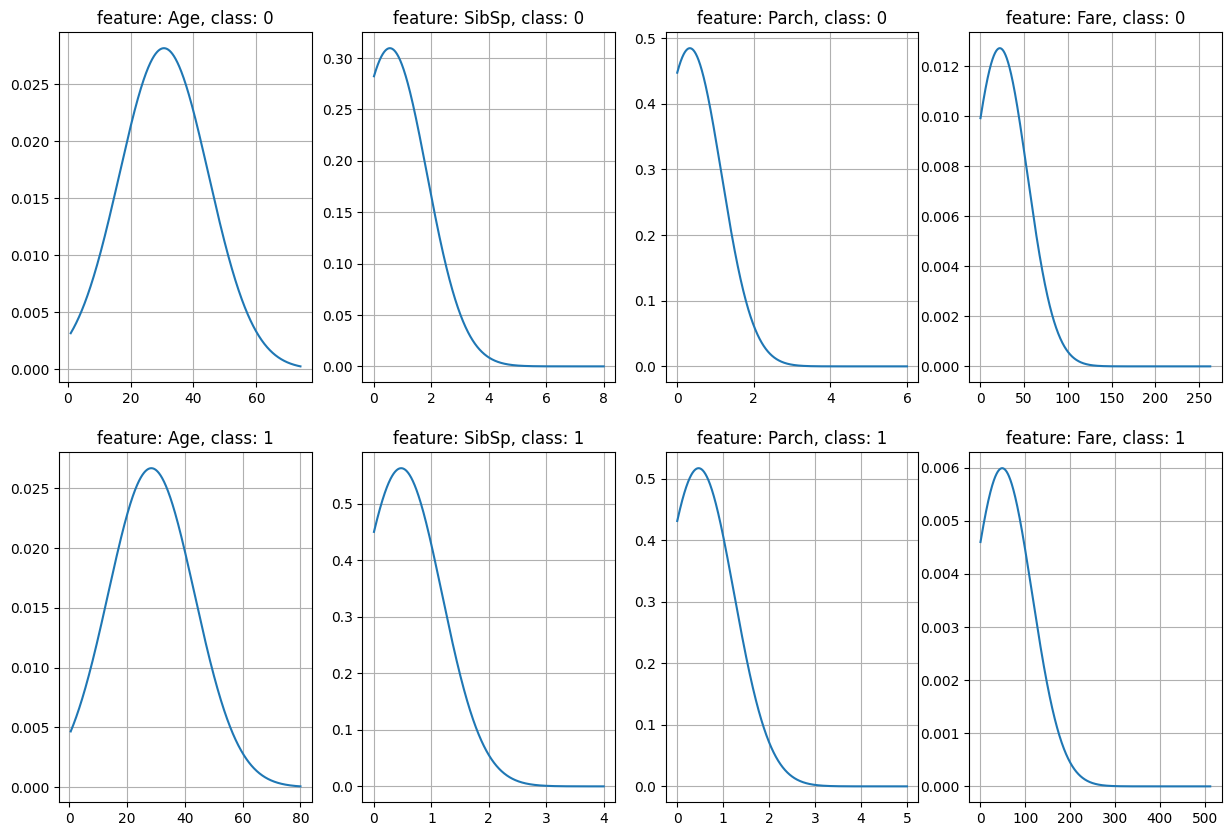

In [250]:
# plot the Gaussian distribution from scipy
from scipy.stats import norm

fig, axes = plt.subplots(2, 4, figsize=(15, 10))

for feature_idx, feature_name in enumerate(cont_features):
    for label_idx, label_name in enumerate(np.unique(target)):
        ax = axes[label_idx, feature_idx]
        feature_col = features.loc[target==label_name, feature_name]
        gaussian_dist = norm(loc=feature_col.mean(axis=0), scale=feature_col.std(axis=0))
        linspace = np.linspace(feature_col.min(), feature_col.max(), 1000)
        ax.plot(linspace, gaussian_dist.pdf(linspace.reshape(-1, 1)))
        ax.grid()
        ax.set_title(f'feature: {feature_name}, class: {label_name}')

In [211]:
cat_features

['Pclass', 'Sex', 'Cabin', 'Embarked']

In order to use NaiveBayes in this problem, we need to use:
1. *GaussianNB* for continuous features
2. *CategoricalNB* for categorical features
Combine the results from this two classifier

The feature transformations to the data will be the same as in kNN, but now we don't need to do normalization of out features, because the Naive Bayes deal with each feature independantly. Also, we will change the OneHot encoding with the OrdinalEncoder()

## Case 1. Age: mean, Cabin: drop

In [278]:
from sklearn.base import ClassifierMixin
from sklearn.naive_bayes import GaussianNB, CategoricalNB


class HybridNaiveBayes(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.gaussian_nb = GaussianNB()
        self.categorical_nb = CategoricalNB()
    
    def fit(self, X_cont, X_cat, y):
        self.gaussian_nb.fit(X_cont, y)
        self.categorical_nb.fit(X_cat, y)
        return self
    
    def predict(self, X_cont, X_cat):
        y_pred_cont = self.gaussian_nb.predict_proba(X_cont)
        y_pred_cat = self.categorical_nb.predict_proba(X_cat)
        y_pred_combined = y_pred_cont * y_pred_cat
        return np.argmax(y_pred_combined, axis=1)

    def predict_proba(self, X_cont, X_cat):
        y_pred_cont = self.gaussian_nb.predict_proba(X_cont)
        y_pred_cat = self.categorical_nb.predict_proba(X_cat)
        return y_pred_cont * y_pred_cat

In [294]:
from sklearn.preprocessing import OrdinalEncoder


features_edit = features
target_edit = target

features_edit = features_edit.loc[:, features_edit.columns.drop('Cabin')]

n_folds = 10
test_factor = 0.20
f1_scores = list()

for i in range(n_folds):
    X_train, X_test, y_train, y_test = train_test_split(features_edit, target_edit, test_size=test_factor)
    
    # categorical features preprocessing
    ord_enc = OrdinalEncoder(categories='auto', handle_unknown='use_encoded_value', unknown_value=9)
    X_train_cat = ord_enc.fit_transform(X_train.loc[:, ['Pclass', 'Sex', 'Embarked']]) + 1
    X_test_cat = ord_enc.transform(X_test.loc[:, ['Pclass', 'Sex', 'Embarked']]) + 1
    X_test_cat[X_test_cat == 10] = 0
    
    # continuous features preprocessing
    age_imputer = SimpleImputer(strategy='mean')
    X_train_cont = X_train.loc[:, cont_features]
    X_test_cont = X_test.loc[:, cont_features]
    X_train_cont.loc[:, 'Age'] = age_imputer.fit_transform(X_train.loc[:, 'Age'].to_numpy().reshape(-1, 1))
    X_test_cont.loc[:, 'Age'] = age_imputer.transform(X_test.loc[:, 'Age'].to_numpy().reshape(-1, 1))
    
    hybrid_nb = HybridNaiveBayes()
    hybrid_nb.fit(X_train_cont, X_train_cat, y_train)     
    f1_scores.append(f1_score(y_test, hybrid_nb.predict(X_test_cont, X_test_cat)))
    
print(np.mean(f1_scores))

0.6261479173294575


## Case 2. Age: median, Cabin: drop

In [295]:
from sklearn.preprocessing import OrdinalEncoder


features_edit = features
target_edit = target

features_edit = features_edit.loc[:, features_edit.columns.drop('Cabin')]

n_folds = 10
test_factor = 0.20
f1_scores = list()

for i in range(n_folds):
    X_train, X_test, y_train, y_test = train_test_split(features_edit, target_edit, test_size=test_factor)
    
    # categorical features preprocessing
    ord_enc = OrdinalEncoder(categories='auto', handle_unknown='use_encoded_value', unknown_value=9)
    X_train_cat = ord_enc.fit_transform(X_train.loc[:, ['Pclass', 'Sex', 'Embarked']]) + 1
    X_test_cat = ord_enc.transform(X_test.loc[:, ['Pclass', 'Sex', 'Embarked']]) + 1
    X_test_cat[X_test_cat == 10] = 0
    
    # continuous features preprocessing
    age_imputer = SimpleImputer(strategy='median')
    X_train_cont = X_train.loc[:, cont_features]
    X_test_cont = X_test.loc[:, cont_features]
    X_train_cont.loc[:, 'Age'] = age_imputer.fit_transform(X_train.loc[:, 'Age'].to_numpy().reshape(-1, 1))
    X_test_cont.loc[:, 'Age'] = age_imputer.transform(X_test.loc[:, 'Age'].to_numpy().reshape(-1, 1))
    
    hybrid_nb = HybridNaiveBayes()
    hybrid_nb.fit(X_train_cont, X_train_cat, y_train)     
    f1_scores.append(f1_score(y_test, hybrid_nb.predict(X_test_cont, X_test_cat)))
    
print(np.mean(f1_scores))

0.6303155717377582


## Case 3. Age: mode, Cabin: drop

In [298]:
from sklearn.preprocessing import OrdinalEncoder


features_edit = features
target_edit = target

features_edit = features_edit.loc[:, features_edit.columns.drop('Cabin')]

n_folds = 10
test_factor = 0.20
f1_scores = list()

for i in range(n_folds):
    X_train, X_test, y_train, y_test = train_test_split(features_edit, target_edit, test_size=test_factor)
    
    # categorical features preprocessing
    ord_enc = OrdinalEncoder(categories='auto', handle_unknown='use_encoded_value', unknown_value=9)
    X_train_cat = ord_enc.fit_transform(X_train.loc[:, ['Pclass', 'Sex', 'Embarked']]) + 1
    X_test_cat = ord_enc.transform(X_test.loc[:, ['Pclass', 'Sex', 'Embarked']]) + 1
    X_test_cat[X_test_cat == 10] = 0
    
    # continuous features preprocessing
    age_imputer = SimpleImputer(strategy='most_frequent')
    X_train_cont = X_train.loc[:, cont_features]
    X_test_cont = X_test.loc[:, cont_features]
    X_train_cont.loc[:, 'Age'] = age_imputer.fit_transform(X_train.loc[:, 'Age'].to_numpy().reshape(-1, 1))
    X_test_cont.loc[:, 'Age'] = age_imputer.transform(X_test.loc[:, 'Age'].to_numpy().reshape(-1, 1))
    
    hybrid_nb = HybridNaiveBayes()
    hybrid_nb.fit(X_train_cont, X_train_cat, y_train)     
    f1_scores.append(f1_score(y_test, hybrid_nb.predict(X_test_cont, X_test_cat)))
    
print(np.mean(f1_scores))

0.630893777893884


## Case 4. Age: kNN, Cabin: drop

In [315]:
features_edit = features
target_edit = target

features_edit = features_edit.loc[:, features_edit.columns.drop('Cabin')]

n_folds = 10
test_factor = 0.20
f1_scores = list()

for i in range(n_folds):
    X_train, X_test, y_train, y_test = train_test_split(features_edit, target_edit, test_size=test_factor)
    
    # categorical features preprocessing
    ord_enc = OrdinalEncoder(categories='auto', handle_unknown='use_encoded_value', unknown_value=9)
    X_train_cat = ord_enc.fit_transform(X_train.loc[:, ['Pclass', 'Sex', 'Embarked']]) + 1
    X_test_cat = ord_enc.transform(X_test.loc[:, ['Pclass', 'Sex', 'Embarked']]) + 1
    X_test_cat[X_test_cat == 10] = 0
    
    # continuous features preprocessing
    age_imputer = KNNImputer(n_neighbors=5)
    X_train_cont = X_train.loc[:, cont_features]
    X_test_cont = X_test.loc[:, cont_features]
    
    X_train_cont = age_imputer.fit_transform(X_train_cont)
    X_test_cont = age_imputer.transform(X_test_cont)
    X_train_cont = pd.DataFrame(X_train_cont, columns=age_imputer.get_feature_names_out())
    X_test_cont = pd.DataFrame(X_test_cont, columns=age_imputer.get_feature_names_out())
    
    hybrid_nb = HybridNaiveBayes()
    hybrid_nb.fit(X_train_cont, X_train_cat, y_train)     
    f1_scores.append(f1_score(y_test, hybrid_nb.predict(X_test_cont, X_test_cat)))
    
print(np.mean(f1_scores))

0.6385429888685097


## Case 5. Age: MICE, Cabin: drop

In [316]:
features_edit = features
target_edit = target

features_edit = features_edit.loc[:, features_edit.columns.drop('Cabin')]

n_folds = 10
test_factor = 0.20
f1_scores = list()

for i in range(n_folds):
    X_train, X_test, y_train, y_test = train_test_split(features_edit, target_edit, test_size=test_factor)
    
    # categorical features preprocessing
    ord_enc = OrdinalEncoder(categories='auto', handle_unknown='use_encoded_value', unknown_value=9)
    X_train_cat = ord_enc.fit_transform(X_train.loc[:, ['Pclass', 'Sex', 'Embarked']]) + 1
    X_test_cat = ord_enc.transform(X_test.loc[:, ['Pclass', 'Sex', 'Embarked']]) + 1
    X_test_cat[X_test_cat == 10] = 0
    
    # continuous features preprocessing
    age_imputer = IterativeImputer()
    X_train_cont = X_train.loc[:, cont_features]
    X_test_cont = X_test.loc[:, cont_features]
    
    X_train_cont = age_imputer.fit_transform(X_train_cont)
    X_test_cont = age_imputer.transform(X_test_cont)
    X_train_cont = pd.DataFrame(X_train_cont, columns=age_imputer.get_feature_names_out())
    X_test_cont = pd.DataFrame(X_test_cont, columns=age_imputer.get_feature_names_out())
    
    hybrid_nb = HybridNaiveBayes()
    hybrid_nb.fit(X_train_cont, X_train_cat, y_train)     
    f1_scores.append(f1_score(y_test, hybrid_nb.predict(X_test_cont, X_test_cat)))
    
print(np.mean(f1_scores))

0.6389089185238251


## Case 6. Age: MICE, Cabin: letter

In [320]:
features_edit = features
target_edit = target

n_folds = 10
test_factor = 0.20
f1_scores = list()

for i in range(n_folds):
    X_train, X_test, y_train, y_test = train_test_split(features_edit, target_edit, test_size=test_factor)
    
    # categorical features preprocessing
    cabin_transform = CabinPreprocessing(type='letter')
    X_train_cat = cabin_transform.fit_transform(X_train.loc[:, cat_features])
    X_test_cat = cabin_transform.transform(X_test.loc[:, cat_features])
    
    ord_enc = OrdinalEncoder(categories='auto', handle_unknown='use_encoded_value', unknown_value=999)
    X_train_cat = ord_enc.fit_transform(X_train_cat) + 1
    X_test_cat = ord_enc.transform(X_test_cat) + 1
    X_test_cat[X_test_cat == 1000] = 0
    
    # continuous features preprocessing
    age_imputer = IterativeImputer()
    X_train_cont = X_train.loc[:, cont_features]
    X_test_cont = X_test.loc[:, cont_features]
    
    X_train_cont = age_imputer.fit_transform(X_train_cont)
    X_test_cont = age_imputer.transform(X_test_cont)
    X_train_cont = pd.DataFrame(X_train_cont, columns=age_imputer.get_feature_names_out())
    X_test_cont = pd.DataFrame(X_test_cont, columns=age_imputer.get_feature_names_out())
    
    hybrid_nb = HybridNaiveBayes()
    hybrid_nb.fit(X_train_cont, X_train_cat, y_train)     
    f1_scores.append(f1_score(y_test, hybrid_nb.predict(X_test_cont, X_test_cat)))
    
print(np.mean(f1_scores))

0.5859118568854667


## Case 7. Age: MICE, Cabin: onehot

In [321]:
features_edit = features
target_edit = target

n_folds = 10
test_factor = 0.20
f1_scores = list()

for i in range(n_folds):
    X_train, X_test, y_train, y_test = train_test_split(features_edit, target_edit, test_size=test_factor)
    
    # categorical features preprocessing
    X_train_cat = X_train.loc[:, cat_features]
    X_test_cat = X_test.loc[:, cat_features]
    
    ord_enc = OrdinalEncoder(categories='auto', handle_unknown='use_encoded_value', unknown_value=999)
    X_train_cat = ord_enc.fit_transform(X_train_cat) + 1
    X_test_cat = ord_enc.transform(X_test_cat) + 1
    X_test_cat[X_test_cat == 1000] = 0
    
    # continuous features preprocessing
    age_imputer = IterativeImputer()
    X_train_cont = X_train.loc[:, cont_features]
    X_test_cont = X_test.loc[:, cont_features]
    
    X_train_cont = age_imputer.fit_transform(X_train_cont)
    X_test_cont = age_imputer.transform(X_test_cont)
    X_train_cont = pd.DataFrame(X_train_cont, columns=age_imputer.get_feature_names_out())
    X_test_cont = pd.DataFrame(X_test_cont, columns=age_imputer.get_feature_names_out())
    
    hybrid_nb = HybridNaiveBayes()
    hybrid_nb.fit(X_train_cont, X_train_cat, y_train)     
    f1_scores.append(f1_score(y_test, hybrid_nb.predict(X_test_cont, X_test_cat)))
    
print(np.mean(f1_scores))

0.5417105245561538


## Results

The results for the NB classifier is way poorer, than kNN (0.5-0.6 vs 0.73)

# Logistic Regression

For the logistic regression we need:
1. Normalize all the continuous features
2. OneHot all the categorical features
3. We can cross-validate for penalties: l1, l2 and for regularization factor C

In [322]:
from sklearn.linear_model import LogisticRegression

## Case 1. Age: MICE, Cabin: drop

In [324]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    object 
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [330]:
features_edit = features
target_edit = target

features_edit = features_edit.loc[:, features_edit.columns.drop('Cabin')]

n_folds = 10
test_factor = 0.20
cv_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
f1_scores = dict()

total_iterations = len(cv_params['penalty']) * len(cv_params['C']) * n_folds

with tqdm(total=total_iterations) as pbar:
    for penalty_type in cv_params['penalty']:
        for reg_factor in cv_params['C']:
            cur_score = list()
            for fold in range(n_folds):
                X_train, X_test, y_train, y_test = train_test_split(features_edit, target_edit, test_size=test_factor)

                ohe = ColumnTransformer(transformers=[
                    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), ['Pclass',
                                                                                                        'Sex',
                                                                                                        'Embarked']),
                    ('pass', 'passthrough', ['Age', 'SibSp', 'Parch', 'Fare'])
                ], verbose_feature_names_out=False)
                X_train = pd.DataFrame(ohe.fit_transform(X_train), columns=ohe.get_feature_names_out())
                X_test = pd.DataFrame(ohe.transform(X_test), columns=ohe.get_feature_names_out())        
                
                age_imputer = IterativeImputer()
                X_train = age_imputer.fit_transform(X_train)
                X_test = age_imputer.transform(X_test)
                X_train = pd.DataFrame(X_train, columns=age_imputer.get_feature_names_out())
                X_test = pd.DataFrame(X_test, columns=age_imputer.get_feature_names_out())
                
                scaler = ColumnTransformer(
                    transformers=[('scaler', StandardScaler(), cont_features)],
                    remainder='passthrough'
                    )
                pipe = Pipeline(steps=[
                    ('scaler_cont_features', scaler),
                    ('log_reg', LogisticRegression(penalty=penalty_type, C=reg_factor, solver='liblinear'))
                ])
                
                pipe.fit(X_train, y_train)
                cur_score.append(f1_score(y_test, pipe.predict(X_test)))
                pbar.update(1)
                
            f1_scores[f'{penalty_type}, C={reg_factor}'] = np.mean(cur_score)
        
print(f'max f1-score: {max(f1_scores.values())} found at params: {max(f1_scores, key=f1_scores.get)}')

  0%|          | 0/140 [00:00<?, ?it/s]

c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


max f1-score: 0.7590907654875646 found at params: l2, C=10


## Case 2. Age: MICE, Cabin: letter

In [441]:
features_edit = features
target_edit = target

n_folds = 25
test_factor = 0.15
cv_params = {'penalty': ['l1', 'l2'], 'C': np.logspace(-4, 4, 9)}
f1_scores = dict()

total_iterations = len(cv_params['penalty']) * len(cv_params['C']) * n_folds

with tqdm(total=total_iterations) as pbar:
    for penalty_type in cv_params['penalty']:
        for reg_factor in cv_params['C']:
            cur_score = list()
            for fold in range(n_folds):
                X_train, X_test, y_train, y_test = train_test_split(features_edit, target_edit, test_size=test_factor)
                
                cabin_transform = CabinPreprocessing(type='letter')
                X_train = cabin_transform.fit_transform(X_train)
                X_test = cabin_transform.transform(X_test)

                ohe = ColumnTransformer(transformers=[
                    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), ['Pclass',
                                                                                                        'Sex',
                                                                                                        'Embarked']),
                    ('pass', 'passthrough', ['Age', 'SibSp', 'Parch', 'Fare'])
                ], verbose_feature_names_out=False)
                X_train = pd.DataFrame(ohe.fit_transform(X_train), columns=ohe.get_feature_names_out())
                X_test = pd.DataFrame(ohe.transform(X_test), columns=ohe.get_feature_names_out())        
                
                age_imputer = IterativeImputer()
                X_train = age_imputer.fit_transform(X_train)
                X_test = age_imputer.transform(X_test)
                X_train = pd.DataFrame(X_train, columns=age_imputer.get_feature_names_out())
                X_test = pd.DataFrame(X_test, columns=age_imputer.get_feature_names_out())
                
                scaler = ColumnTransformer(
                    transformers=[('scaler', StandardScaler(), cont_features)],
                    remainder='passthrough'
                    )
                pipe = Pipeline(steps=[
                    ('scaler_cont_features', scaler),
                    ('log_reg', LogisticRegression(penalty=penalty_type, C=reg_factor, solver='liblinear'))
                ])
                
                pipe.fit(X_train, y_train)
                cur_score.append(f1_score(y_test, pipe.predict(X_test)))
                pbar.update(1)
                
            f1_scores[f'{penalty_type}, C={reg_factor}'] = np.mean(cur_score)
        
print(f'max f1-score: {max(f1_scores.values())} found at params: {max(f1_scores, key=f1_scores.get)}')

  0%|          | 0/450 [00:00<?, ?it/s]

c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWar

max f1-score: 0.7653149543166056 found at params: l2, C=1000.0


## Case 3. Age: MICE, Cabin: OneHot

In [334]:
features_edit = features
target_edit = target

n_folds = 10
test_factor = 0.20
cv_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
f1_scores = dict()

total_iterations = len(cv_params['penalty']) * len(cv_params['C']) * n_folds

with tqdm(total=total_iterations) as pbar:
    for penalty_type in cv_params['penalty']:
        for reg_factor in cv_params['C']:
            cur_score = list()
            for fold in range(n_folds):
                X_train, X_test, y_train, y_test = train_test_split(features_edit, target_edit, test_size=test_factor)

                ohe = ColumnTransformer(transformers=[
                    ('ohe', OneHotEncoder(drop='first', 
                                          handle_unknown='ignore', 
                                          sparse_output=False,
                                          max_categories=50), ['Pclass',
                                                                                                        'Sex',
                                                                                                        'Embarked',
                                                                                                        'Cabin']),
                    ('pass', 'passthrough', ['Age', 'SibSp', 'Parch', 'Fare'])
                ], verbose_feature_names_out=False)
                X_train = pd.DataFrame(ohe.fit_transform(X_train), columns=ohe.get_feature_names_out())
                X_test = pd.DataFrame(ohe.transform(X_test), columns=ohe.get_feature_names_out())        
                
                age_imputer = IterativeImputer()
                X_train = age_imputer.fit_transform(X_train)
                X_test = age_imputer.transform(X_test)
                X_train = pd.DataFrame(X_train, columns=age_imputer.get_feature_names_out())
                X_test = pd.DataFrame(X_test, columns=age_imputer.get_feature_names_out())
                
                scaler = ColumnTransformer(
                    transformers=[('scaler', StandardScaler(), cont_features)],
                    remainder='passthrough'
                    )
                pipe = Pipeline(steps=[
                    ('scaler_cont_features', scaler),
                    ('log_reg', LogisticRegression(penalty=penalty_type, C=reg_factor, solver='liblinear'))
                ])
                
                pipe.fit(X_train, y_train)
                cur_score.append(f1_score(y_test, pipe.predict(X_test)))
                pbar.update(1)

            f1_scores[f'{penalty_type}, C={reg_factor}'] = np.mean(cur_score)
            
print(f'max f1-score: {max(f1_scores.values())} found at params: {max(f1_scores, key=f1_scores.get)}')

  0%|          | 0/140 [00:00<?, ?it/s]

c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWar

max f1-score: 0.7474536786183668 found at params: l2, C=100


The best f1: 0.76, which is better than kNN and NB.

# Random Forest

The RF from sklearn works only with numeric features. So we need to do this steps:
1. OneHot all categorical data
Also, we don't need the normalization.
We will cross-validate through:
* n_estimators
* max_features
* max_depth
* min_samples_leaf

In [386]:
from sklearn.ensemble import RandomForestClassifier

## Case 1. Age: mean, Cabin: drop

In [387]:
features_edit, target_edit = features.copy(), target.copy()
features_edit.drop(columns='Cabin', inplace=True)

f1_scores = dict()
cv_params = {'n_estimators': [100, 250, 500],
             'max_features': ['sqrt'],
             'max_depth': [10, 25, 50],
             'min_samples_leaf': [1, 5, 10, 15]}
n_folds = 5
total_iterations = len(cv_params['n_estimators']) * len(cv_params['max_features']) * len(cv_params['max_depth']) * len(cv_params['min_samples_leaf']) * n_folds

In [388]:
with tqdm(total=total_iterations) as pbar:
    for n_estimators in cv_params['n_estimators']:
        for max_features in cv_params['max_features']:
            for max_depth in cv_params['max_depth']:
                for min_samples_leaf in cv_params['min_samples_leaf']:
                    cur_score = list()
                    col_tr = ColumnTransformer(transformers=[
                        ('ohe', OneHotEncoder(drop='first', 
                                            handle_unknown='ignore', 
                                            sparse_output=False,
                                            max_categories=50), ['Pclass', 'Sex', 'Embarked']),
                        ('age_imputer', SimpleImputer(strategy='mean'), ['Age']),
                        ('pass', 'passthrough', ['SibSp', 'Parch', 'Fare'])
                    ], verbose_feature_names_out=False)
                    
                    rfc = RandomForestClassifier(n_estimators=n_estimators,
                                            max_depth=max_depth,
                                            min_samples_leaf=min_samples_leaf,
                                            max_features=max_features)
                    
                    pipe = Pipeline(steps=[
                        ('preprocessing', col_tr),
                        ('classifier', rfc)
                    ])
                    for fold in range(n_folds):
                        X_train, X_test, y_train, y_test = train_test_split(features_edit, target_edit, test_size=test_factor)
                        pipe.fit(X_train, y_train)
                        cur_score.append(f1_score(y_test, pipe.predict(X_test)))
                        pbar.update(1)

                    f1_scores[pipe.named_steps['classifier']] = np.mean(cur_score)
            
print(f'max f1-score: {max(f1_scores.values())} found at params: {max(f1_scores, key=f1_scores.get)}')

  0%|          | 0/180 [00:00<?, ?it/s]

c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWar

max f1-score: 0.7871112183570128 found at params: RandomForestClassifier(max_depth=10, n_estimators=500)


## Case 2. Age: MICE, Cabin: drop

In [389]:
features_edit, target_edit = features.copy(), target.copy()
features_edit.drop(columns='Cabin', inplace=True)

f1_scores = dict()
cv_params = {'n_estimators': [100, 250, 500],
             'max_features': ['sqrt'],
             'max_depth': [10, 25, 50],
             'min_samples_leaf': [1, 5, 10, 15]}
n_folds = 5
total_iterations = len(cv_params['n_estimators']) * len(cv_params['max_features']) * len(cv_params['max_depth']) * len(cv_params['min_samples_leaf']) * n_folds

In [390]:
with tqdm(total=total_iterations) as pbar:
    for n_estimators in cv_params['n_estimators']:
        for max_features in cv_params['max_features']:
            for max_depth in cv_params['max_depth']:
                for min_samples_leaf in cv_params['min_samples_leaf']:
                    cur_score = list()
                    col_tr = ColumnTransformer(transformers=[
                        ('ohe', OneHotEncoder(drop='first', 
                                            handle_unknown='ignore', 
                                            sparse_output=False,
                                            max_categories=50), ['Pclass', 'Sex', 'Embarked']),
                        ('age_imputer', IterativeImputer(), ['Age']),
                        ('pass', 'passthrough', ['SibSp', 'Parch', 'Fare'])
                    ], verbose_feature_names_out=False)
                    
                    rfc = RandomForestClassifier(n_estimators=n_estimators,
                                            max_depth=max_depth,
                                            min_samples_leaf=min_samples_leaf,
                                            max_features=max_features)
                    
                    pipe = Pipeline(steps=[
                        ('preprocessing', col_tr),
                        ('classifier', rfc)
                    ])
                    for fold in range(n_folds):
                        X_train, X_test, y_train, y_test = train_test_split(features_edit, target_edit, test_size=test_factor)
                        pipe.fit(X_train, y_train)
                        cur_score.append(f1_score(y_test, pipe.predict(X_test)))
                        pbar.update(1)

                    f1_scores[pipe.named_steps['classifier']] = np.mean(cur_score)
            
print(f'max f1-score: {max(f1_scores.values())} found at params: {max(f1_scores, key=f1_scores.get)}')

  0%|          | 0/180 [00:00<?, ?it/s]

c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWar

max f1-score: 0.7810412865227392 found at params: RandomForestClassifier(max_depth=50, n_estimators=500)


## Case 3. Age: mean, Cabin: letter

In [401]:
features_edit, target_edit = features.copy(), target.copy()

f1_scores = dict()
cv_params = {'n_estimators': [100, 250, 500],
             'max_features': ['sqrt', 'log2'],
             'max_depth': [10, 25, 50],
             'min_samples_leaf': [1, 5, 10, 15]}
n_folds = 5
total_iterations = len(cv_params['n_estimators']) * len(cv_params['max_features']) * len(cv_params['max_depth']) * len(cv_params['min_samples_leaf']) * n_folds

In [402]:
with tqdm(total=total_iterations) as pbar:
    for n_estimators in cv_params['n_estimators']:
        for max_features in cv_params['max_features']:
            for max_depth in cv_params['max_depth']:
                for min_samples_leaf in cv_params['min_samples_leaf']:
                    cur_score = list()
                    col_tr = ColumnTransformer(transformers=[
                        ('ohe', OneHotEncoder(drop='first', 
                                            handle_unknown='ignore', 
                                            sparse_output=False), ['Pclass', 'Sex', 'Embarked', 'Cabin']),
                        ('age_imputer', SimpleImputer(strategy='mean'), ['Age']),
                    ], verbose_feature_names_out=False, remainder='passthrough')
                    
                    rfc = RandomForestClassifier(n_estimators=n_estimators,
                                            max_depth=max_depth,
                                            min_samples_leaf=min_samples_leaf,
                                            max_features=max_features)
                    
                    pipe = Pipeline(steps=[
                        ('preprocessing', col_tr),
                        ('classifier', rfc)
                    ])
                    for fold in range(n_folds):
                        X_train, X_test, y_train, y_test = train_test_split(features_edit, target_edit, test_size=test_factor)
                        cabin_transform = CabinPreprocessing(type='letter')
                        X_train = cabin_transform.fit_transform(X_train)
                        X_test = cabin_transform.transform(X_test)
                        pipe.fit(X_train, y_train)
                        cur_score.append(f1_score(y_test, pipe.predict(X_test)))
                        pbar.update(1)

                    f1_scores[pipe.named_steps['classifier']] = np.mean(cur_score)
            
print(f'max f1-score: {max(f1_scores.values())} found at params: {max(f1_scores, key=f1_scores.get)}')

  0%|          | 0/360 [00:00<?, ?it/s]

c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWar

max f1-score: 0.7884483322862685 found at params: RandomForestClassifier(max_depth=10, max_features='log2')


The f1-score from RF are greater that the NB, kNN and Log Reg

# Gradient Boosting (sklearn)

In [404]:
from sklearn.ensemble import GradientBoostingClassifier

# Case 1. Age: MICE, Cabin: letter

In [405]:
features_edit, target_edit = features.copy(), target.copy()

f1_scores = dict()
cv_params = {'n_estimators': [100, 250, 500],
             'criterion': ['friedman_mse', 'squared_error'],
             'max_depth': [10, 25, 50],
             'min_samples_leaf': [1, 5, 10, 15]}
n_folds = 5
total_iterations = len(cv_params['n_estimators']) * len(cv_params['criterion']) * len(cv_params['max_depth']) * len(cv_params['min_samples_leaf']) * n_folds

In [406]:
with tqdm(total=total_iterations) as pbar:
    for n_estimators in cv_params['n_estimators']:
        for criterion in cv_params['criterion']:
            for max_depth in cv_params['max_depth']:
                for min_samples_leaf in cv_params['min_samples_leaf']:
                    cur_score = list()
                    col_tr = ColumnTransformer(transformers=[
                        ('ohe', OneHotEncoder(drop='first', 
                                            handle_unknown='ignore', 
                                            sparse_output=False), ['Pclass', 'Sex', 'Embarked', 'Cabin']),
                        ('age_imputer', SimpleImputer(strategy='mean'), ['Age']),
                    ], verbose_feature_names_out=False, remainder='passthrough')
                    
                    rfc = GradientBoostingClassifier(n_estimators=n_estimators,
                                            max_depth=max_depth,
                                            min_samples_leaf=min_samples_leaf,
                                            criterion=criterion)
                    
                    pipe = Pipeline(steps=[
                        ('preprocessing', col_tr),
                        ('classifier', rfc)
                    ])
                    for fold in range(n_folds):
                        X_train, X_test, y_train, y_test = train_test_split(features_edit, target_edit, test_size=test_factor)
                        cabin_transform = CabinPreprocessing(type='letter')
                        X_train = cabin_transform.fit_transform(X_train)
                        X_test = cabin_transform.transform(X_test)
                        pipe.fit(X_train, y_train)
                        cur_score.append(f1_score(y_test, pipe.predict(X_test)))
                        pbar.update(1)

                    f1_scores[pipe.named_steps['classifier']] = np.mean(cur_score)
            
print(f'max f1-score: {max(f1_scores.values())} found at params: {max(f1_scores, key=f1_scores.get)}')

  0%|          | 0/360 [00:00<?, ?it/s]

c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWar

max f1-score: 0.7858116808806257 found at params: GradientBoostingClassifier(criterion='squared_error', max_depth=25,
                           min_samples_leaf=5)


# Testing

Let's testing the best models:
1. Log Reg (l2, C=1000.0) with 'Age': MICE, 'Cabin': letter
2. RandomForestClassifier(max_depth=10, max_features='log2'), with 'Age': MICE, 'Cabin': letter
3. GradientBoostingClassifier(criterion='squared_error', max_depth=25, min_samples_leaf=5) with 'Age': MICE, 'Cabin': letter

## Logistic Regression

In [481]:
from sklearn.metrics import accuracy_score

Predict the results from 'test.csv' and send to the Kaggle

In [502]:
test_data = pd.read_csv('data/test.csv', index_col=0)
test_data.drop(columns=['Name', 'Ticket'], inplace=True)
test_data.loc[:, ['Cabin', 'Embarked']] = SimpleImputer(missing_values=pd.NA, strategy='constant', fill_value='Missing').fit_transform(test_data.loc[:, ['Cabin', 'Embarked']])

In [484]:
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.1)

cabin_transform = CabinPreprocessing(type='letter')
X_train = cabin_transform.fit_transform(X_train)
X_val = cabin_transform.transform(X_val)
X_test = cabin_transform.transform(test_data)

ohe = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), ['Pclass',
                                                                                        'Sex',
                                                                                        'Embarked']),
    ('pass', 'passthrough', ['Age', 'SibSp', 'Parch', 'Fare'])
], verbose_feature_names_out=False)
X_train = pd.DataFrame(ohe.fit_transform(X_train), columns=ohe.get_feature_names_out())
X_test = pd.DataFrame(ohe.transform(X_test), columns=ohe.get_feature_names_out())
X_val = pd.DataFrame(ohe.transform(X_val), columns=ohe.get_feature_names_out())                

age_imputer = IterativeImputer()
X_train = age_imputer.fit_transform(X_train)
X_test = age_imputer.transform(X_test)
X_val = age_imputer.transform(X_val)

X_train = pd.DataFrame(X_train, columns=age_imputer.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=age_imputer.get_feature_names_out())
X_val = pd.DataFrame(X_val, columns=age_imputer.get_feature_names_out())

scaler = ColumnTransformer(
    transformers=[('scaler', StandardScaler(), cont_features)],
    remainder='passthrough'
    )
pipe = Pipeline(steps=[
    ('scaler_cont_features', scaler),
    ('log_reg', LogisticRegression(penalty='l2', C=1000))
])

pipe.fit(X_train, y_train)
y_pred_val = pipe.predict(X_val)
y_pred_test = pipe.predict(X_test)

print('f1 val', f1_score(y_val, y_pred_val))
print('acc val', accuracy_score(y_val, y_pred_val))

f1 val 0.8115942028985508
acc val 0.8555555555555555


In [485]:
result = pd.DataFrame(np.concatenate([test_data.index.values.reshape(-1, 1), y_pred_test.reshape(-1, 1)], axis=1), columns=['PassengerId', 'Survived'])
result.to_csv('submissions/logreg.csv', index=False)

## Random Forest

In [499]:
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.1)

cabin_transform = CabinPreprocessing(type='letter')
X_train = cabin_transform.fit_transform(X_train)
X_val = cabin_transform.transform(X_val)
X_test = cabin_transform.transform(test_data)

col_tr = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(drop='first', 
                        handle_unknown='ignore', 
                        sparse_output=False), ['Pclass', 'Sex', 'Embarked', 'Cabin']),
    ('age_imputer', IterativeImputer(), ['Age']),
], verbose_feature_names_out=False, remainder='passthrough')

rfc = RandomForestClassifier(max_depth=10, max_features='log2')

pipe = Pipeline(steps=[
    ('preprocessing', col_tr),
    ('classifier', rfc)
])

pipe.fit(X_train, y_train)
y_pred_val = pipe.predict(X_val)
y_pred_test = pipe.predict(X_test)
print('f1 val', f1_score(y_val, y_pred_val))
print('acc val', accuracy_score(y_val, y_pred_val))

f1 val 0.7
acc val 0.8


In [492]:
result = pd.DataFrame(np.concatenate([test_data.index.values.reshape(-1, 1), y_pred_test.reshape(-1, 1)], axis=1), columns=['PassengerId', 'Survived'])
result.to_csv('submissions/random_forest.csv', index=False)

## Gradient Boosting

In [509]:
cabin_transform = CabinPreprocessing(type='letter')
X_train = cabin_transform.fit_transform(features)
X_test = cabin_transform.transform(test_data)

col_tr = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(drop='first', 
                        handle_unknown='ignore', 
                        sparse_output=False), ['Pclass', 'Sex', 'Embarked', 'Cabin']),
    ('imputer', SimpleImputer(strategy='mean'), ['Age', 'Fare']),
], verbose_feature_names_out=False, remainder='passthrough')

rfc = GradientBoostingClassifier(criterion='squared_error', max_depth=25, min_samples_leaf=5)

pipe = Pipeline(steps=[
    ('preprocessing', col_tr),
    ('classifier', rfc)
])

pipe.fit(X_train, target)
y_pred = pipe.predict(X_test)

In [510]:
result = pd.DataFrame(np.concatenate([test_data.index.values.reshape(-1, 1), y_pred_test.reshape(-1, 1)], axis=1), columns=['PassengerId', 'Survived'])
result.to_csv('submissions/gradient_boosting.csv', index=False)